## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


#Side Notes:

#method	description
#sum()	summation
#mean()	average
#count()	count of all values
#size()	count of non-null values
#max()	maximum value
#min()	minimum value
#std()	standard deviation
#median()	median

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge two dataframes using an inner join/ automatically inner and do not need how = '' to get inner join
mouse_and_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_and_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
mouse_and_study_df.info

<bound method DataFrame.info of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898 

In [93]:
# Checking the number of mice. Find unique amouint of mice
mouse_count = len(mouse_and_study_df["Mouse ID"].unique())
mouse_count

249

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = mouse_and_study_df[mouse_and_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_and_study_df[mouse_and_study_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_mouse = mouse_and_study_df[mouse_and_study_df["Mouse ID"] !="g989"]
clean_data_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice in the clean DataFrame.
#nunique gives a count of unique values vs unique returns a lists of all values
clean_mouse_count = clean_data_mouse.nunique()["Mouse ID"]

clean_mouse_count

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#[]means interested in the mean regimen of tumor volume

tumor_vol_mean = clean_data_mouse.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_vol_median= clean_data_mouse.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_vol_var = clean_data_mouse.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_vol_std = clean_data_mouse.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
tumor_vol_sem = clean_data_mouse.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, "Variance":tumor_vol_var, "Standard Deviation": tumor_vol_std, "Standard Error Mean ": tumor_vol_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [100]:
clean_data_mouse.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

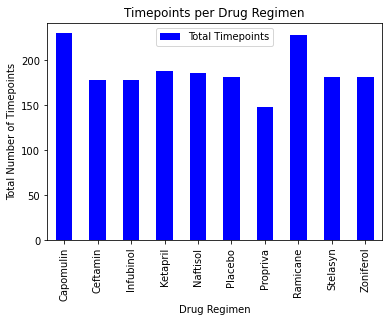

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice_drug = clean_data_mouse.groupby("Drug Regimen").count()

mice_bar = total_mice_drug[["Timepoint"]].rename(columns = {"Timepoint":"Total Timepoints"})
mice_bar.plot(kind = "bar", facecolor = 'blue',alpha = 1.0)
plt.ylabel("Total Number of Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.show()

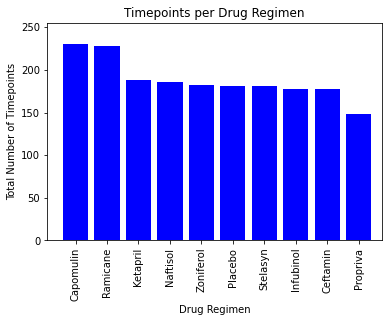

In [102]:
# Generate a bar plot showing the total number of timepoints for mice tested for each drug regimen using pyplot.
total_mice_drug2 = clean_data_mouse["Drug Regimen"].value_counts()
x_axis = np.arange(len(total_mice_drug2))

#Set tick location
tick_locations = [value for value in x_axis]
#Plot Bar
plt.bar(x_axis, total_mice_drug2, color='blue', alpha=1, align='center')
plt.xticks(tick_locations, total_mice_drug2.index.values, rotation='vertical')

# Set the limits of the x axis
plt.xlim(-0.9, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(total_mice_drug2)+25)

# Give our chart some labels and a tile
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

plt.show()

        Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       922           922         922         922        922   
Male         958           958         958         958        958   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 922               922  
Male                   958               958  


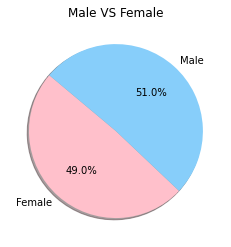

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#clean_data_mouse.groupby(by='Sex').size()
#Split the sex of mice
sex_of_mice2 =clean_data_mouse.groupby(by="Sex").agg('count')
print (sex_of_mice2)

#Syntax for removing the y axis label(Future Reference)
    #ax.yaxis.set_visible(False)
#Syntax for removing the y axis label(Future Reference)
colors = ["pink","lightskyblue"]
sex_of_mice2.plot(kind = "pie", y = "Mouse ID", title = "Male VS Female",autopct="%.1f%%", shadow=True, 
                  startangle=140, colors = colors, legend = False).yaxis.set_visible(False)


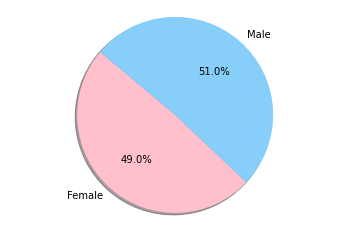

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
split_sex = (clean_data_mouse.groupby(["Sex"])["Mouse ID"].count())
colors = ["pink","lightskyblue"]
sex = ["Female","Male"]
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(split_sex, colors=colors, labels = sex,
        autopct="%0.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Max_timepoint = clean_data_mouse.groupby(["Mouse ID"])["Timepoint"].max()
#Max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Last_timepoint= pd.merge(Max_timepoint , clean_data_mouse, on=(["Mouse ID","Timepoint"]))
Last_timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in treatments:
    drugRegimen = Last_timepoint.loc[Last_timepoint["Drug Regimen"] == drugs]
    tumorval = drugRegimen["Tumor Volume (mm3)"]
    treatments_tumor.append(tumorval)
    # add subset 
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = tumorval.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"IQR for {drugs}:{iqr}")

    print(f"The lower quartile of {drugs} is: {lowerq}")
    print(f"The upper quartile of {drugs} is: {upperq}")
    print(f"The interquartile range of {drugs} is: {iqr}")
    print(f"The the median of {drugs} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"---------------------------------------")
    
  

IQR for Capomulin:7.781863460000004
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------
IQR for Ramicane:9.098536719999998
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------
IQR for Infubinol:11.477135160000003
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.832904949999

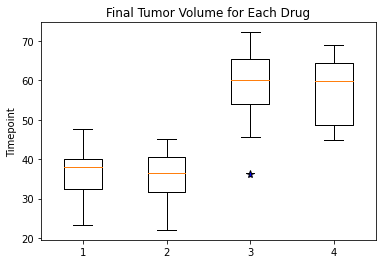

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='b',markersize= 8, markeredgecolor='black')

# Plot boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Each Drug')
ax1.set_ylabel('Timepoint')
ax1.boxplot(treatments_tumor, flierprops= flierprops)

plt.show()

## Line and Scatter Plots

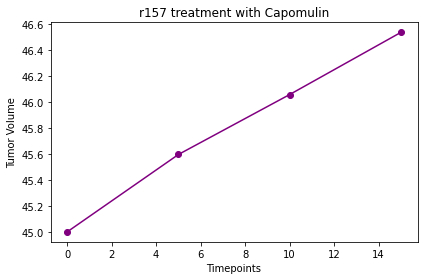

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = clean_data_mouse.loc[clean_data_mouse["Drug Regimen"] == "Capomulin"]
capomulin_mice
#Treat "a mouse" with Capomulin
A_mouse = clean_data_mouse.loc[clean_data_mouse["Mouse ID"]== "r157"]
timepoint_xaxis = A_mouse["Timepoint"]
tumor_yaxis= A_mouse["Tumor Volume (mm3)"]

plt.plot(timepoint_xaxis, tumor_yaxis, color="purple",marker ='o')
plt.title("r157 treatment with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.tight_layout()
plt.show()


In [121]:
capomulin_mice.describe

<bound method NDFrame.describe of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  

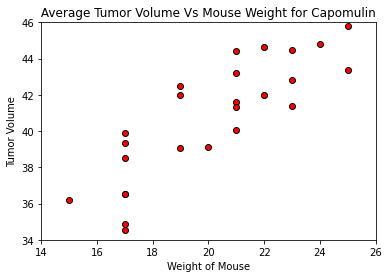

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c_regimen_avg = capomulin_mice.groupby('Mouse ID').mean()
weight_x=c_regimen_avg["Weight (g)"]
tumor_y= c_regimen_avg["Tumor Volume (mm3)"]

plt.scatter(weight_x,tumor_y,marker="o", facecolors="red", edgecolors="black")
plt.title(" Average Tumor Volume Vs Mouse Weight for Capomulin ")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
# Set the upper and lower limits of our y axis
plt.ylim(34,46)
# Set the upper and lower limits of our x axis
plt.xlim(14,26)
plt.show()

## Correlation and Regression

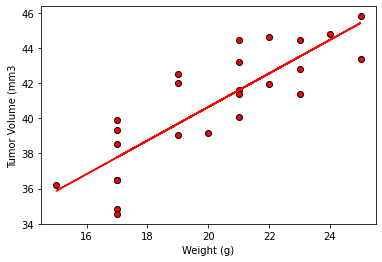

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_x=c_regimen_avg["Weight (g)"]
tumor_y= c_regimen_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, tumor_y)
regress_values = weight_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_x, tumor_y, marker="o", facecolors="red", edgecolors="black")
plt.plot(weight_x, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3')

plt.show()



In [58]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight_x, tumor_y)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
